In [1]:
pip install pyforest 

  Stored in directory: C:\Users\Anchal\AppData\Local\pip\Cache\wheels\77\f9\78\51500678d6ce472b574216a40cba6c81d1766ee7cc838cce3c
Successfully built pyforest
Note: you may need to restart the kernel to use updated packages.


# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



In [6]:
from pyforest import *

In [7]:
train = pd.read_table("C:\\Users\\Anchal\\Documents\\Muskan\\Big Mart Sales\\Train_UWu5bXk.txt", sep=",")

C:\Users\Anchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [8]:
test = pd.read_table("C:\\Users\\Anchal\\Documents\\Muskan\\Big Mart Sales\\Test_u94Q5KV.txt", sep=",")

C:\Users\Anchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [9]:
#preview first 5 rowa of the data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [12]:
train['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
5        556.6088
6        343.5528
7       4022.7636
8       1076.5986
9       4710.5350
10      1516.0266
11      2187.1530
12      1589.2646
13      2145.2076
14      1977.4260
15      1547.3192
16      1621.8888
17       718.3982
18      2303.6680
19      2748.4224
20      3775.0860
21      4064.0432
22      1587.2672
23       214.3876
24      4078.0250
25       838.9080
26      1065.2800
27       308.9312
28       178.4344
29       125.8362
          ...    
8493    4727.1800
8494    1637.8680
8495    4314.3840
8496    3715.1640
8497    2247.0750
8498    1601.2490
8499    2976.1260
8500    1907.5170
8501    1508.0370
8502    3020.0688
8503    3392.9168
8504    4138.6128
8505    2117.2440
8506    3944.8650
8507     515.9950
8508    2587.9646
8509     424.7804
8510    7182.6504
8511    4207.8560
8512    2479.4392
8513     595.2252
8514     468.7232
8515    1571.2880
8516     858.8820
8517    36

## Steps to modelling :

1. problem statment

2. Hypothesis testing

3. EDA

    3.1 Univariate Analysis
    
    3.2 Biavariate or multivariate analysis
    
    3.3 Missing value treatment
    
    3.4 Outlier Identification
    
    3.5 Feature Engineering
    
    3.6 Standardization - this is the last step of EDA popularly known as Data Pre-Processing Step.

4. Apllying ML models

## Exploratory Data Analysis

1. Univariate Analysis

The columns in the dataset are either Numerical or Categorical.
    
For Numerical Columns - Create Histogram | Distplot
    
Histogram is a statistical plot that tells me how is the data been distributed if it is not normal (Bell Shaped Curve), then it would be skewed 

For categorical column, we will create a Barplot | Frequency | ValueCount

In [13]:
#pull target variable 
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
sns.distplot(train.Item_Outlet_Sales, color = 'm')
plt.show()

#sales +vely skewed

C:\Users\Anchal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 640x480 with 1 Axes>

In [15]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

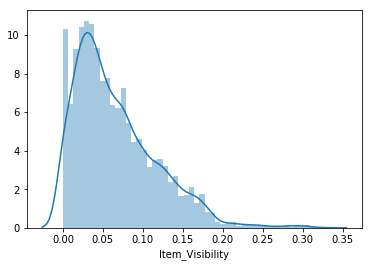

In [16]:
sns.distplot(train.Item_Visibility)
plt.show()

#visibility is higher for lot of items

C:\Users\Anchal\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\Anchal\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

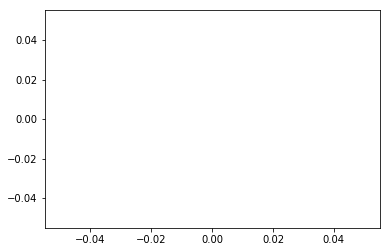

In [17]:
sns.distplot(train.Item_Weight)
plt.show()

#there are missing values that is why error comes "cannot convert float NaN to integer"
#drop the values using dropna

In [ ]:
sns.distplot(train.Item_Weight.dropna())
plt.show()

In [ ]:
sns.distplot(train.Item_MRP, color = 'red')
plt.show()

#MRP appears to have 4 different dist/values. need more exploring.
#X axis : actual values
#Y axis : frequencies

In [ ]:
#pull item fat content
train.Item_Fat_Content.value_counts().plot(kind = "bar")
plt.show()

In [ ]:
train.Item_Fat_Content.replace(to_replace = ['LF', 'low fat'],
                               value = ['Low Fat', 'Low Fat'], inplace = True)


In [ ]:
train.Item_Fat_Content.replace(to_replace = ['reg'],
                               value = ['Regular'], inplace = True)


In [ ]:
train.Item_Fat_Content.value_counts().plot('bar')
plt.show()

In [ ]:
train.Item_Fat_Content.value_counts()

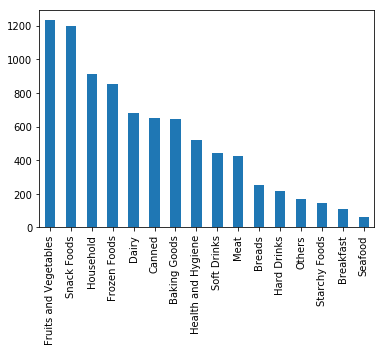

In [18]:
#find Item fat content
#it is easy to read
#for ex. find top 5 items so this graph is easy to identify select first 5 items.
train.Item_Type.value_counts().plot(kind = 'bar')
plt.show()

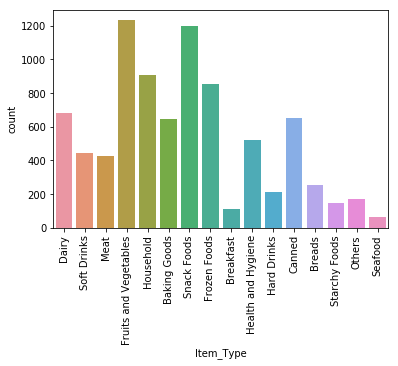

In [19]:
#by sns
sns.countplot(x = 'Item_Type', data = train)
plt.xticks(rotation = 90)
plt.show()

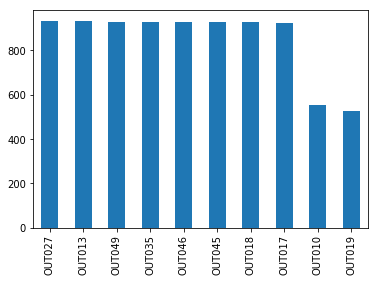

In [20]:
#outlet identifier
train.Outlet_Identifier.value_counts().plot(kind = 'bar')
plt.show()

#less frequency count is OUT10 and OUT19

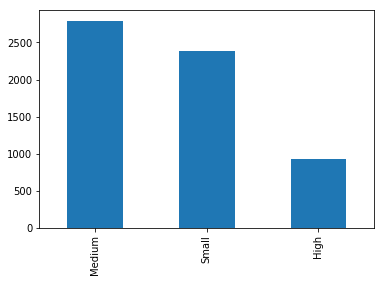

In [21]:
#outlet size
train.Outlet_Size.value_counts().plot(kind = 'bar')
plt.show()

#medium

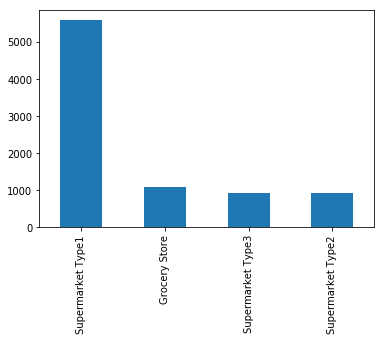

In [22]:
#outlet type
train.Outlet_Type.value_counts().plot(kind = 'bar')
plt.show()

#supermarket Type1

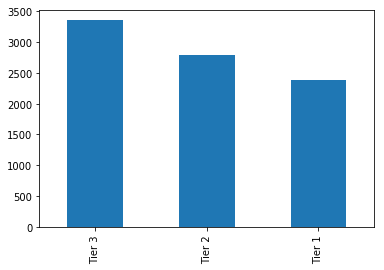

In [23]:
train.Outlet_Location_Type.value_counts().plot(kind = 'bar')
plt.show()

#Tier 3

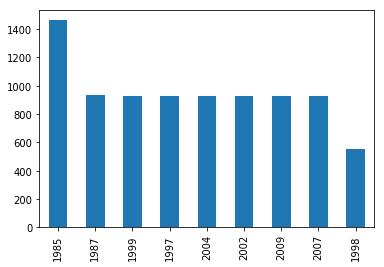

In [24]:
train.Outlet_Establishment_Year.value_counts().plot(kind = 'bar')
plt.show()


# Bivariate Analysis

1. Num vs Num - Scatterplot

2. Cat vs Num - Boxplot (statistical plot) | Violin Plot

3. Cat vs Cat - pd.crosstab | Table - Frequency 

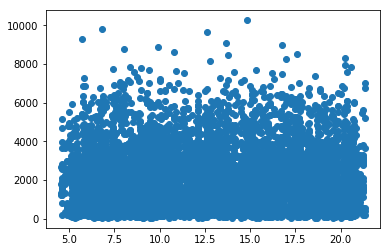

In [25]:
#num vs num
plt.scatter(train.Item_Weight , train.Item_Outlet_Sales)

#no pattern as such between the duo

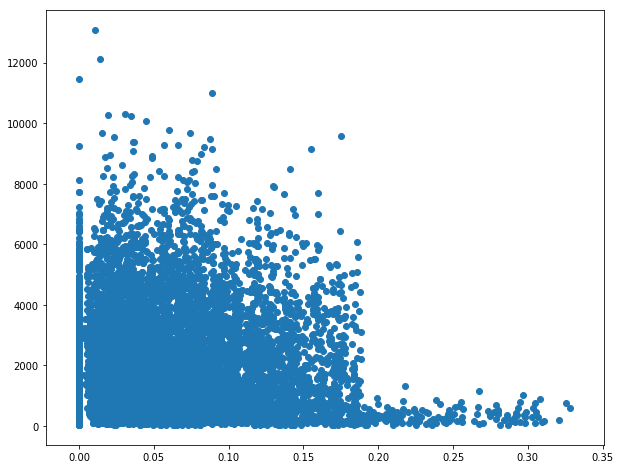

In [26]:
plt.figure(figsize = [10,8])
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales)

#lots of 0 exist for which sales exists

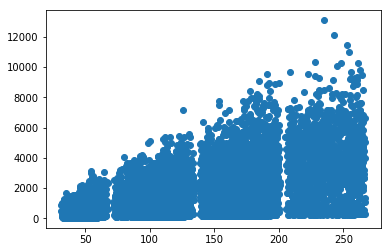

In [27]:
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales)

In [28]:
#cat vs num

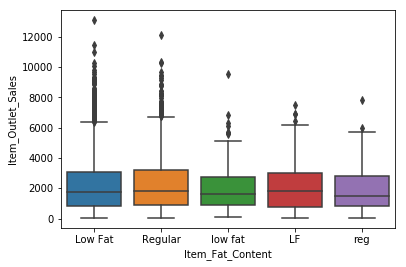

In [29]:
sns.boxplot(train.Item_Fat_Content, train.Item_Outlet_Sales)
plt.show()

In [30]:
train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe().T

Item_Fat_Content,LF,Low Fat,Regular,low fat,reg
count,316.000000,5089.000000,2889.000000,112.000000,117.000000
mean,2073.551928,2164.477336,2235.186702,2087.740737,1962.192268
std,1535.282582,1706.599391,1727.715941,1747.723146,1543.170658
min,40.613800,33.290000,33.955800,83.890800,37.950600
25%,729.051000,826.923600,860.213600,912.146000,798.960000
50%,1797.660000,1765.701600,1845.597600,1614.232100,1492.723600
75%,2990.107800,3057.353600,3219.808800,2753.415900,2821.660400
max,7503.566000,13086.964800,12117.560000,9562.219600,7833.802800


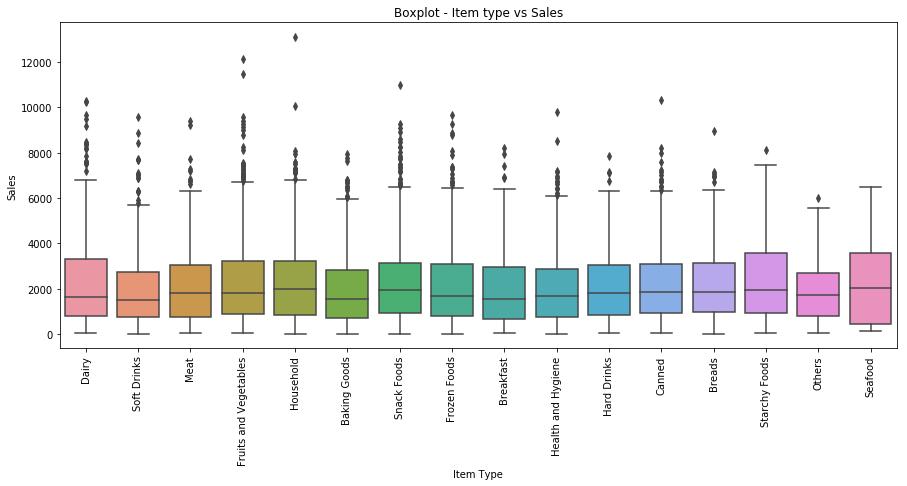

In [31]:
plt.figure(figsize = [15,6])
sns.boxplot(train.Item_Type, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title('Boxplot - Item type vs Sales')
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.show()

#hint = Refer ANOVA

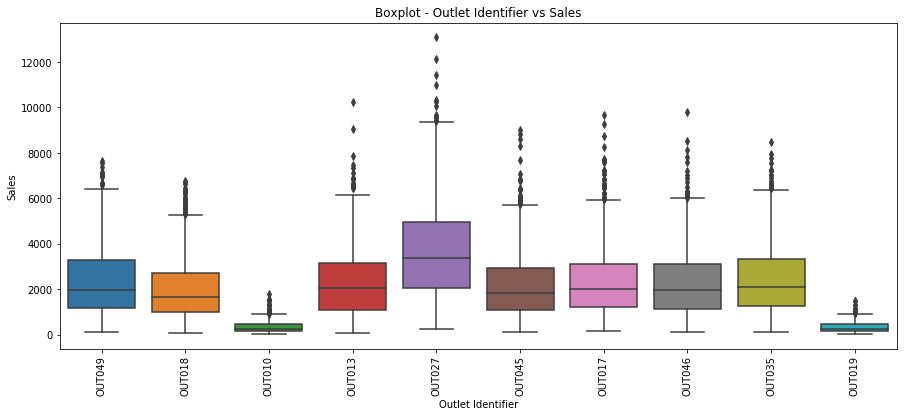

In [32]:
plt.figure(figsize = [15,6])
sns.boxplot(train.Outlet_Identifier, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title('Boxplot - Outlet Identifier vs Sales')
plt.xlabel('Outlet Identifier')
plt.ylabel('Sales')
plt.show()

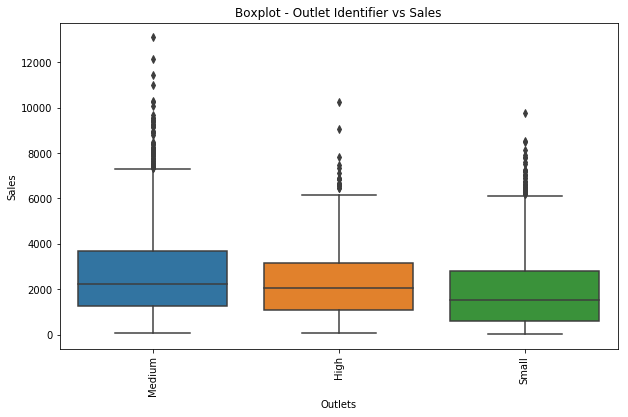

In [33]:
#outlet size
plt.figure(figsize = [10,6])
sns.boxplot(train.Outlet_Size, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title('Boxplot - Outlet Identifier vs Sales')
plt.xlabel('Outlets')
plt.ylabel('Sales')
plt.show()

In [34]:
pd.DataFrame(train.groupby("Outlet_Size")["Outlet_Identifier"].value_counts()).T

Outlet_Size         High Medium                Small              
Outlet_Identifier OUT013 OUT027 OUT049 OUT018 OUT035 OUT046 OUT019
Outlet_Identifier    932    935    930    928    930    930    528

In [35]:
#Missing Values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
train.isnull().sum()[train.isnull().sum() != 0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [37]:
weightna = train[train.Item_Weight.isnull()]

In [38]:
weightna.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [39]:
train[train.Item_Identifier == 'FDC14']["Item_Weight"]

29       NaN
3609    14.5
4297    14.5
5760    14.5
6257     NaN
6346    14.5
6478    14.5
7031    14.5
Name: Item_Weight, dtype: float64

In [40]:
#replace null value at location 29th with 14.5.
train.loc[29, 'Item_Weight'] = 14.5

In [41]:
train[train.Item_Identifier == 'FDC14']["Item_Weight"]

29      14.5
3609    14.5
4297    14.5
5760    14.5
6257     NaN
6346    14.5
6478    14.5
7031    14.5
Name: Item_Weight, dtype: float64

In [42]:
train[train.Item_Identifier == 'FDC14']["Item_Weight"].median()

14.5

In [43]:
#finding ID
#np.where gives you location where is the NAN is present
np.where(train.Item_Weight.isna())

(array([   7,   18,   21, ..., 8488, 8490, 8504], dtype=int64),)

In [44]:
#this will give you location + id where null values are present.
ids = train[pd.isnull(train.Item_Weight)]["Item_Identifier"]
ids.head()

7     FDP10
18    DRI11
21    FDW12
23    FDC37
36    FDV20
Name: Item_Identifier, dtype: object

In [45]:
locs = ids.index
locs

Int64Index([   7,   18,   21,   23,   36,   38,   39,   49,   59,   62,
            ...
            8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
           dtype='int64', length=1462)

In [46]:
#missing value final code
for i in range(0, len(ids)):
    train.loc[locs[i],'Item_Weight'] = train[train.Item_Identifier == ids.values[i]]['Item_Weight'].median()

In [49]:
train[train.Item_Identifier == 'FDC37']['Item_Weight']

23      15.5
4652    15.5
6212    15.5
Name: Item_Weight, dtype: float64

In [219]:
#combining the dataset
combined = pd.concat([train, test], ignore_index = True, sort = False)

In [220]:
combined.isnull().sum()[combined.isnull().sum() != 0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [221]:
#missing value imputation - item weight | Lambda
combined["Item_Weight"] = combined.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.median()))

In [226]:
#misiing values - Item Visibility
combined["Item_Visibility"]= combined.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(to_replace = 0, value = x.median()))

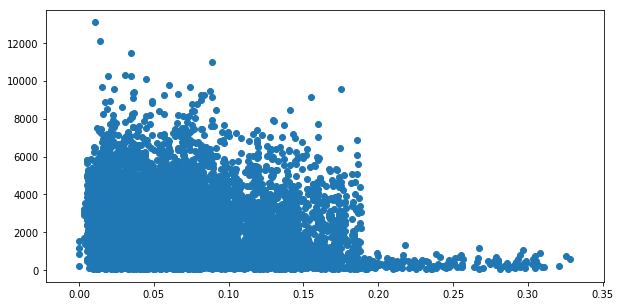

In [234]:
plt.figure(figsize=[10,5])
plt.scatter(combined["Item_Visibility"], combined["Item_Outlet_Sales"])

In [ ]:
#missing value imputation - item weight | Lambda
combined["Item_Weight"] = combined.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.median()))

In [240]:
train[train.Item_Identifier == 'FDY07']['Item_Visibility']

10      0.000000
651     0.000000
779     0.121848
3370    0.122290
4208    0.000000
4791    0.000000
6321    0.121501
Name: Item_Visibility, dtype: float64

In [ ]:
combined.loc[(combined.Item_Identifier == "FDY07") & (combined['Item_Visibility'] != 0)]

In [237]:
train[train.Item_Identifier == 'FDX07']['Item_Weight']

3       19.2
1491    19.2
2459    19.2
3089    19.2
5906    19.2
7735     NaN
Name: Item_Weight, dtype: float64

In [238]:
train[train.Item_Identifier == 'FDX07']['Item_Visibility'].median()

3       0.000000
1491    0.022914
2459    0.022965
3089    0.000000
5906    0.022954
7735    0.022808
Name: Item_Visibility, dtype: float64

In [187]:
pd.DataFrame(train.groupby("Outlet_Location_Type")["Outlet_Size"].value_counts()).T

Outlet_Location_Type Tier 1        Tier 2 Tier 3     
Outlet_Size           Small Medium  Small Medium High
Outlet_Size            1458    930    930   1863  932

In [189]:
#lets deal with Tier 2
train.loc[train['Outlet_Location_Type'] == 'Tier 2', "Outlet_Size"] = "Small"

In [190]:
pd.DataFrame(train.groupby("Outlet_Location_Type")["Outlet_Size"].value_counts()).T

Outlet_Location_Type Tier 1        Tier 2 Tier 3     
Outlet_Size           Small Medium  Small Medium High
Outlet_Size            1458    930   2785   1863  932

# Feature engineering

In [192]:
train["Price Per Unit"] = train["Item_MRP"] / train["Item_Weight"]

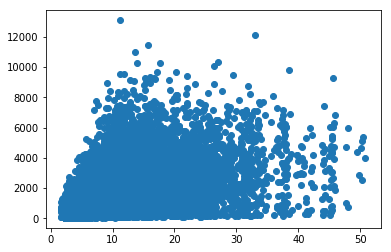

In [193]:
plt.scatter(train['Price Per Unit'], train['Item_Outlet_Sales'])

In [ ]:
#size
combined.groupby("Outlet_Size")["Outlet_Type", "Outlet_Location_Type"]

In [241]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [242]:
weightna = train[train.Outlet_Size.isnull()]

In [243]:
weightna.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [253]:
ids = train[pd.isnull(train.Outlet_Size)]["Outlet_Location_Type"]
ids.head()

3     Tier 3
8     Tier 2
9     Tier 2
25    Tier 2
28    Tier 3
Name: Outlet_Location_Type, dtype: object

In [258]:
ids = train[pd.isnull(train.Outlet_Size)]["Outlet_Type"]
ids

3           Grocery Store
8       Supermarket Type1
9       Supermarket Type1
25      Supermarket Type1
28          Grocery Store
30          Grocery Store
33      Supermarket Type1
45          Grocery Store
46      Supermarket Type1
47      Supermarket Type1
53      Supermarket Type1
54      Supermarket Type1
56      Supermarket Type1
61      Supermarket Type1
65          Grocery Store
67      Supermarket Type1
68      Supermarket Type1
72      Supermarket Type1
73      Supermarket Type1
78      Supermarket Type1
79      Supermarket Type1
85      Supermarket Type1
90          Grocery Store
92      Supermarket Type1
100     Supermarket Type1
107     Supermarket Type1
111     Supermarket Type1
114     Supermarket Type1
116     Supermarket Type1
118     Supermarket Type1
              ...        
8417    Supermarket Type1
8431    Supermarket Type1
8432        Grocery Store
8446    Supermarket Type1
8447    Supermarket Type1
8452    Supermarket Type1
8453    Supermarket Type1
8455    Supe

Rule :

1. Tier 3 and Grocery Store - Medium
2. Tier 2 and S1 - Small

when Outlet Size is NA, then the locations are Tier 2 and Tier 3 and "Grocery Stort" , "Supermarket Type1"

In [259]:
combined[combined.Outlet_Size.isna()]["Outlet_Location_Type"].unique()

array(['Tier 3', 'Tier 2'], dtype=object)

In [267]:
combined.loc[(combined["Outlet_Location_Type"] == "Tier 2") & (combined["Outlet_Type"] == "Supermarket Type1"), 'Outlet_Size'] = ["Small"]

In [268]:
combined.loc[(combined["Outlet_Location_Type"] == "Tier 3") & (combined["Outlet_Type"] == "SGrocery Store"),'Outlet_Size'] = ["Medium"]

In [269]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                   925
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

1. Item Type Category -> convert Item type into two CATs - Perishables and Non Perishables
2. Price Per Unit -> MRP/Weight
3. Outlet Age -> 2013 - Establishment Year 
4. Extract two codes from ID

In [271]:
#3.Price Per Unit
combined['Price Per Unit'] = combined['Item_MRP'] / combined['Item_Weight']

In [273]:
#4.Outlet Age
combined["Outlet Age"] = 2013 - combined.Outlet_Establishment_Year

In [275]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [293]:
#1.Item Type Category
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables','Breads','Breakfast','Seafood']

In [294]:
#using function
def new1(x):
    if(x in perishables):
        return("Perishables")
    else:
        return("Non Perishables")
    
combined.Item_Type.apply(new1)              

0            Perishables
1        Non Perishables
2            Perishables
3            Perishables
4        Non Perishables
5        Non Perishables
6        Non Perishables
7        Non Perishables
8        Non Perishables
9        Non Perishables
10           Perishables
11           Perishables
12           Perishables
13       Non Perishables
14           Perishables
15           Perishables
16       Non Perishables
17           Perishables
18       Non Perishables
19           Perishables
20       Non Perishables
21       Non Perishables
22       Non Perishables
23       Non Perishables
24       Non Perishables
25       Non Perishables
26       Non Perishables
27       Non Perishables
28           Perishables
29       Non Perishables
              ...       
14174    Non Perishables
14175        Perishables
14176        Perishables
14177    Non Perishables
14178        Perishables
14179        Perishables
14180        Perishables
14181    Non Perishables
14182    Non Perishables


In [295]:
np.where(combined.Item_Type.isin(perishables), "Perishables", "Non Perishables")

array(['Perishables', 'Non Perishables', 'Perishables', ...,
       'Non Perishables', 'Non Perishables', 'Non Perishables'],
      dtype='<U15')

In [296]:
#using loop
new2 = []
for i in range(0, len(combined)):
    if(combined.Item_Type[i] in perishables):
        new2.append("Perishables")
    else:
        new2.append("Non Perishables")
    

In [297]:
combined['Item Type Category'] = pd.Series(new2)

In [298]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price Per Unit,Outlet Age,Item Type Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,14,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,4,Non Perishables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,14,Perishables
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115,15,Perishables
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,26,Non Perishables


In [299]:
str(combined.Item_Identifier[0])[:2]

'FD'

In [300]:
item_id = []
for i in combined.Item_Identifier:
    item_id.append(str(i)[:2])

In [301]:
combined["Items_IDs"] = pd.Series(item_id)

In [302]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price Per Unit,Outlet Age,Item Type Category,Items_IDs
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,14,Perishables,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,4,Non Perishables,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,14,Perishables,FD
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115,15,Perishables,FD
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,26,Non Perishables,NC


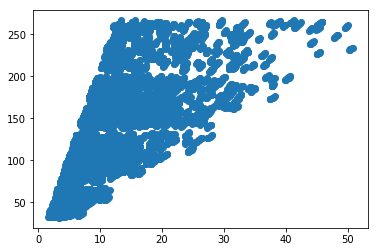

In [303]:
plt.scatter(combined["Price Per Unit"], combined["Item_MRP"])

In [304]:
#dropping the columns
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Price Per Unit', 'Outlet Age',
       'Item Type Category', 'Items_IDs'],
      dtype='object')

In [305]:
newdata = combined.drop(['Item_Identifier','Item_MRP','Item_Type','Outlet_Establishment_Year','Outlet_Identifier'], axis = 1)

In [306]:
newdata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price Per Unit,Outlet Age,Item Type Category,Items_IDs
0,9.30,Low Fat,0.016047,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,14,Perishables,FD
1,5.92,Regular,0.019278,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,4,Non Perishables,DR
2,17.50,Low Fat,0.016760,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,14,Perishables,FD
3,19.20,Regular,0.022914,NaN,Tier 3,Grocery Store,732.3800,9.484115,15,Perishables,FD
4,8.93,Low Fat,0.013177,High,Tier 3,Supermarket Type1,994.7052,6.031512,26,Non Perishables,NC


In [307]:
newdata.shape

(14204, 11)

In [308]:
#APllying OHE
dummydata = pd.get_dummies(newdata)

In [309]:
dummydata.head()

,Item_Weight,Item_Visibility,Item_Outlet_Sales,Price Per Unit,Outlet Age,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item Type Category_Non Perishables,Item Type Category_Perishables,Items_IDs_DR,Items_IDs_FD,Items_IDs_NC
0,9.30,0.016047,3735.1380,26.861204,14,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,5.92,0.019278,443.4228,8.153581,4,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
2,17.50,0.016760,2097.2700,8.092457,14,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,19.20,0.022914,732.3800,9.484115,15,0,0,1,0,0,...,1,1,0,0,0,0,1,0,1,0
4,8.93,0.013177,994.7052,6.031512,26,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,1


In [310]:
#split the data into train and test
newtrain = dummydata[0:train.shape[0]]

In [311]:
newtrain.shape

(8523, 25)

In [312]:
#test
newtest = dummydata[8523:dummydata.shape[0]]

In [314]:
newtest.shape

(5681, 25)

In [315]:
newtest.drop("Item_Outlet_Sales", axis = 1, inplace = True)

C:\Users\Anchal\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [316]:
print(newtrain.shape)
print(newtest.shape)

(8523, 25)
(5681, 24)


## Data Pre-Processing Stage

In [317]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [318]:
#standardized train set
scaled_train = pd.DataFrame(sc.fit_transform(newtrain), columns = newtrain.columns)

C:\Users\Anchal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Anchal\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [319]:
#standardized test set
scaled_test = pd.DataFrame(sc.fit_transform(newtest), columns = newtest.columns)

C:\Users\Anchal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Anchal\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
